In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
# load dataframe and transform categorical variables
df = pd.read_csv('data/heart.csv')
df = pd.get_dummies(df, columns = ['cp', 'restecg', 'slp', 'caa', 'thall'], drop_first = True)

In [3]:
df

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,0,...,0,1,0,1,0,0,0,0,0,1


In [4]:
# split into training and test datasets
random_seed = 777
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = random_seed, stratify = df['output'])

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['output'].value_counts(normalize = True))
print()
print(df_test['output'].value_counts(normalize = True))

(242, 23)
(61, 23)

1    0.545455
0    0.454545
Name: output, dtype: float64

1    0.540984
0    0.459016
Name: output, dtype: float64


In [5]:
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_cols = list(set(df.columns) - set(num_cols) - {'output'})
cat_cols.sort()

In [6]:
# scaling
scaler = StandardScaler()
scaler.fit(df_train[num_cols])

def get_features_and_target_arrays(df, num_cols, cat_cols, scaler):
    X_num_scaled = scaler.transform(df[num_cols])
    X_cat = df[cat_cols].to_numpy()
    X = np.hstack((X_cat, X_num_scaled))
    y = df['output']
    return X, y

X, y = get_features_and_target_arrays(df_train, num_cols, cat_cols, scaler)


In [8]:
# logistic regression
clf = LogisticRegression(penalty = 'none')

clf.fit(X, y)

c:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [9]:
# scaled test dataset
X_test, y_test = get_features_and_target_arrays(df_test, num_cols, cat_cols, scaler)

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


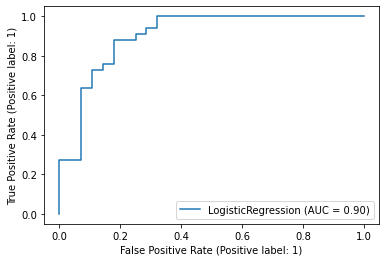

In [10]:
# ROC curve
plot_roc_curve(clf, X_test, y_test)

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


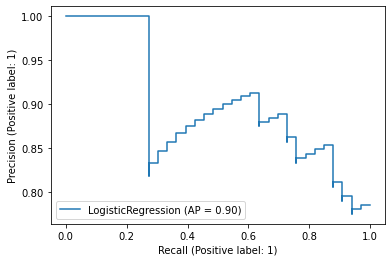

In [11]:
# plot precision-recall curve
plot_precision_recall_curve(clf, X_test, y_test)

In [12]:
# prediction results
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [13]:
# evaluation
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.40548
AUC = 0.90260
Average Precision = 0.89826

Using 0.5 as threshold:
Accuracy = 0.83607
Precision = 0.79487
Recall = 0.93939
F1 score = 0.86111

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



Confusion Matrix


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


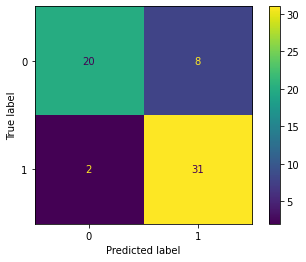

In [14]:
# confusion matrix
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [15]:
# results
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + cat_cols + num_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,5.699948
1,caa_1,-2.083193
2,caa_2,-3.156644
3,caa_3,-1.753306
4,caa_4,0.861886
5,cp_1,1.437120
6,cp_2,2.136276
7,cp_3,2.454066
8,exng,-0.645851
9,fbs,0.510790


In [16]:
# numeric variable std
pd.DataFrame(data = {'variable': num_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,8.712897
1,trtbps,17.878958
2,chol,53.269596
3,thalachh,23.376675
4,oldpeak,1.121367
